In [3]:
#importint the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from dotenv import dotenv_values,load_dotenv
import os

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [4]:
ENV = dotenv_values(".env")
load_dotenv(override=False)

True

In [5]:
#first we upload the dataset 

#Primero cargaremos nuestro set de datos

xls = pd.ExcelFile(os.environ['DATASETS_PATH'] + '/BostonHousing.xlsx')
fileName = os.environ['DATASETS_PATH'] + '/BostonHousing.xlsx'
df_house = pd.read_excel(fileName, sheet_name='Data')
#split the data in train abd test
df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [6]:
df_house.info()
df = df_house

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [7]:
list_keys = df_house.columns.tolist()

In [8]:
df_describe = df_house[list_keys]
df_describe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


 + mean = Media es el promedio de los datos
 + std = La desviación estándar mide la dispersión de una distribución de datos
 + 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
 + 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
 + 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
 + MAX y Min : valores mayor y menor

# Analisis Univariado

# Indice de criminalidad

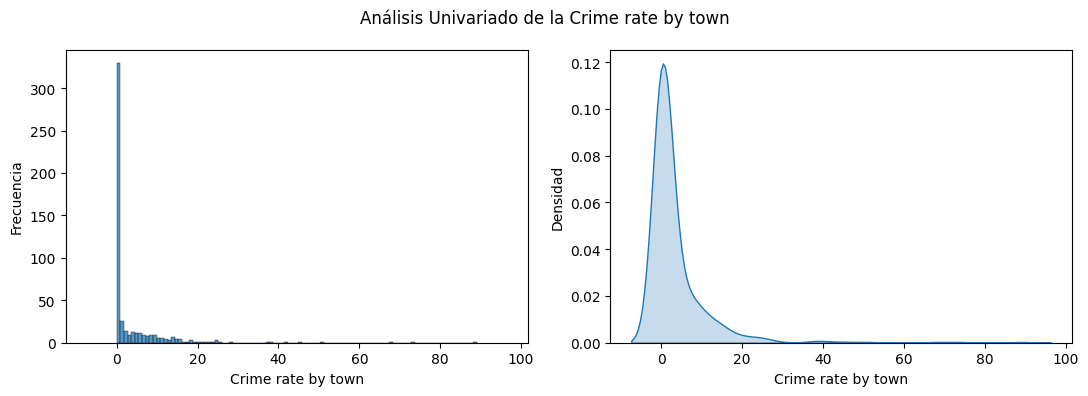

In [72]:
var = 'CRIM'
var_title = 'Crime rate by town'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

In [73]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

# Proporción de suelo residencial zonificado

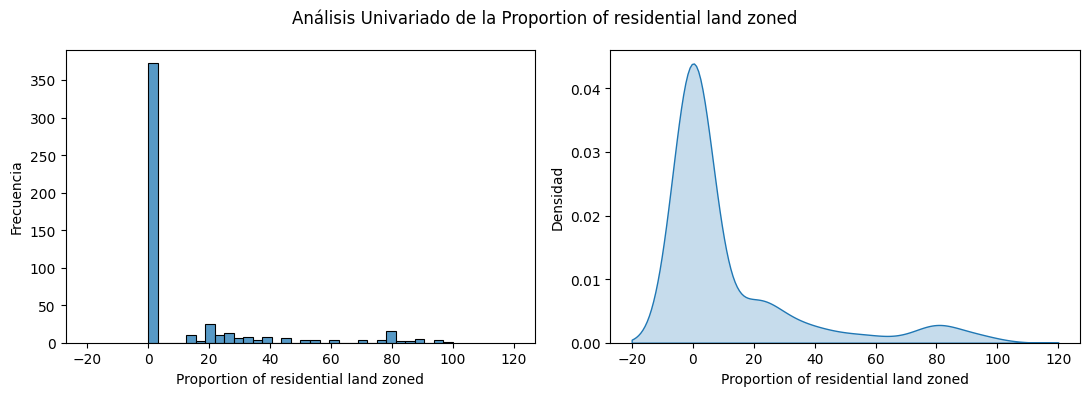

In [74]:
var = 'ZN'
var_title = 'Proportion of residential land zoned'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# proporción de acres de negocios no minoristas por ciudad

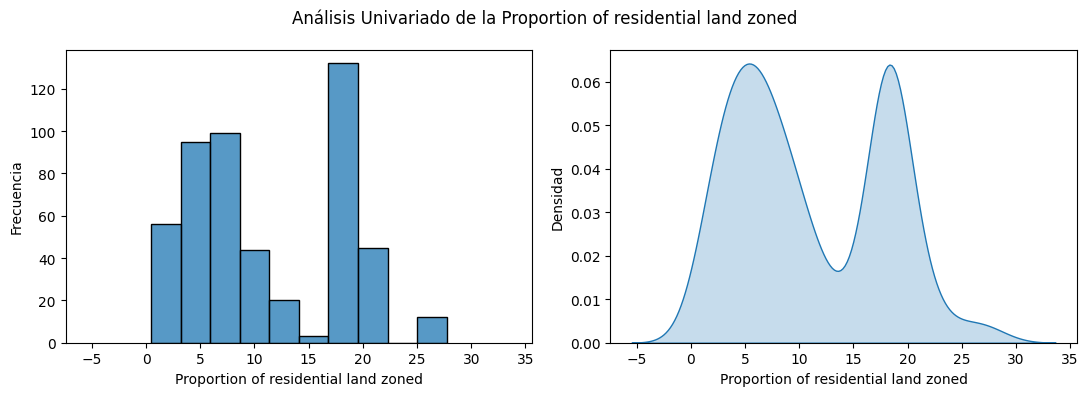

In [75]:
var = 'INDUS'
var_title = 'Proportion of residential land zoned'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Variable ficticia de Charles River 

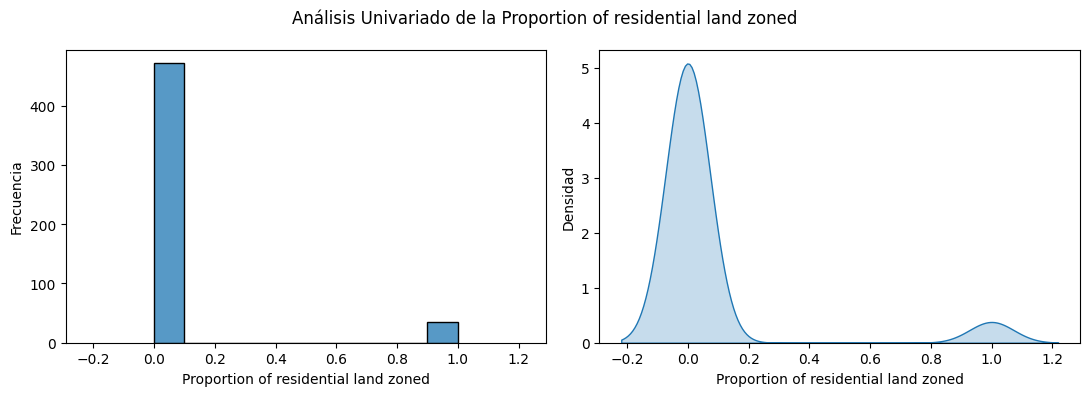

In [76]:
var = 'CHAS'
var_title = 'Proportion of residential land zoned'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Concentración de óxidos nítricos (partes por 10 millones)

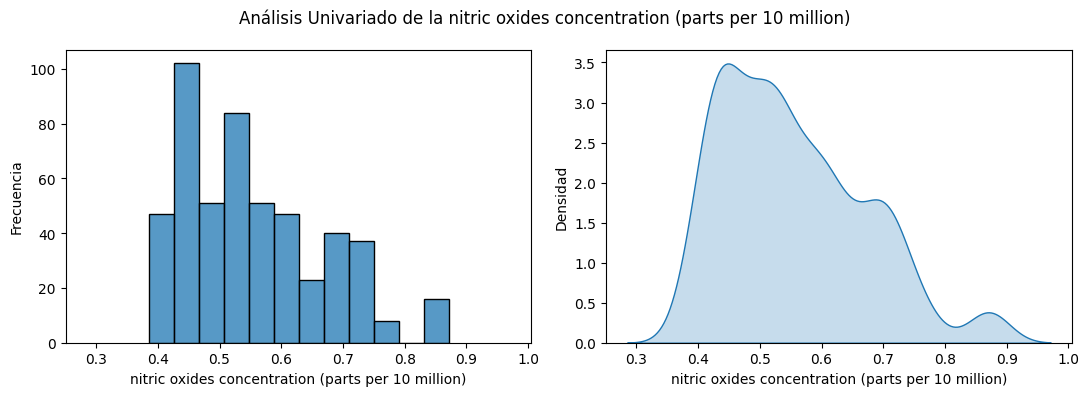

In [77]:
var = 'NOX'
var_title = 'nitric oxides concentration (parts per 10 million)'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# número medio de habitaciones por vivienda

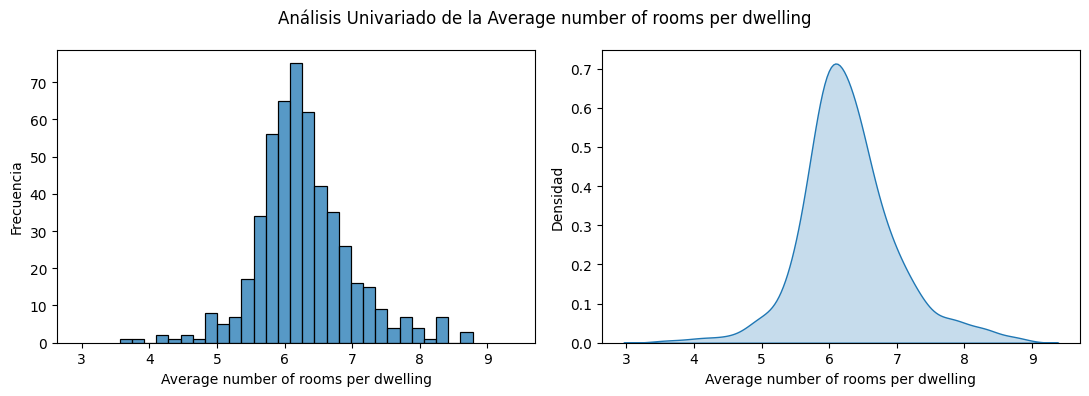

In [78]:
var = 'RM'
var_title = 'Average number of rooms per dwelling'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# proportion of owner-occupied units built prior to 1940 

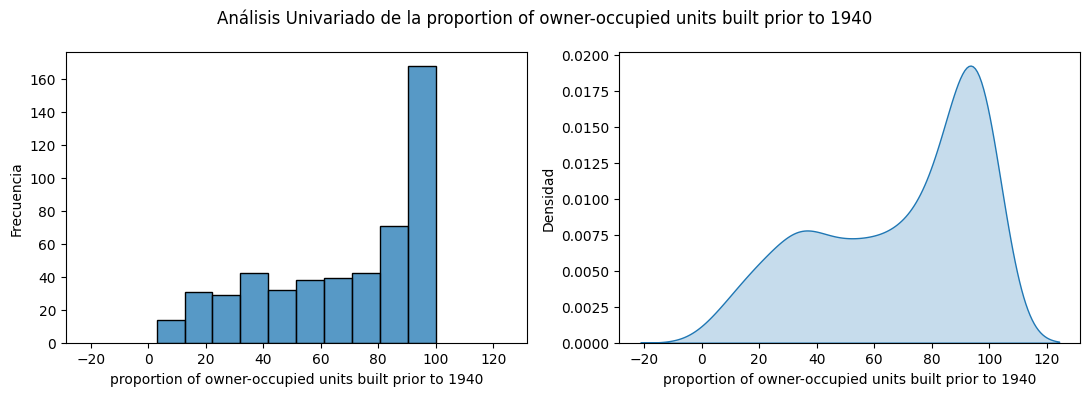

In [79]:
var = 'AGE'
var_title = 'proportion of owner-occupied units built prior to 1940'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Distancias ponderadas a cinco centros de empleo de Boston

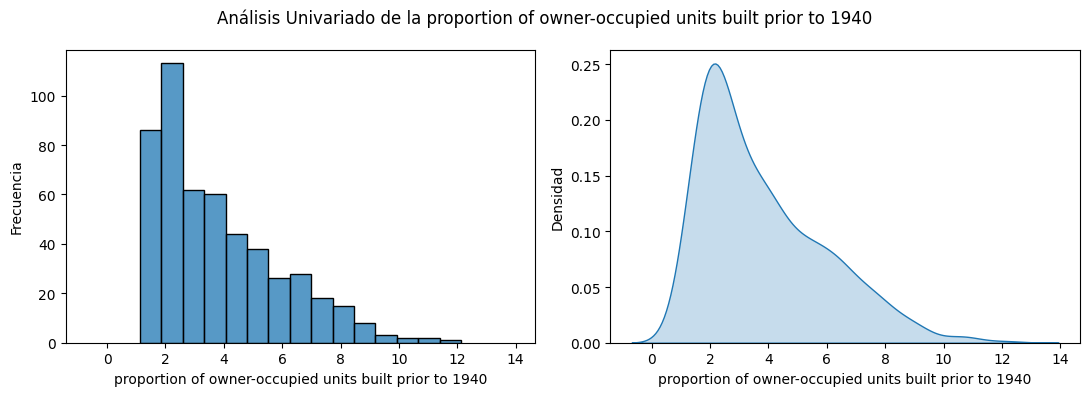

In [80]:
var = 'DIS'
var_title = 'proportion of owner-occupied units built prior to 1940'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# índice de accesibilidad a carreteras

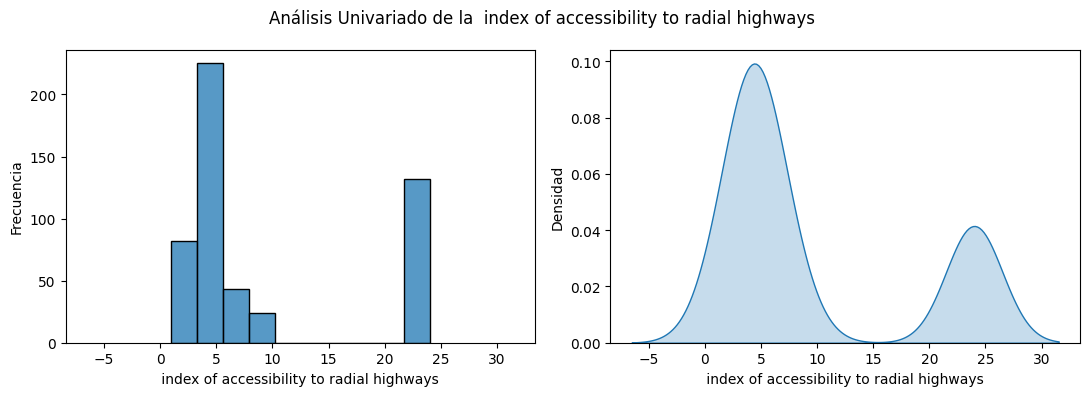

In [81]:
var = 'RAD'
var_title = ' index of accessibility to radial highways '

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# tasa de impuesto a la propiedad de valor total por $10,000

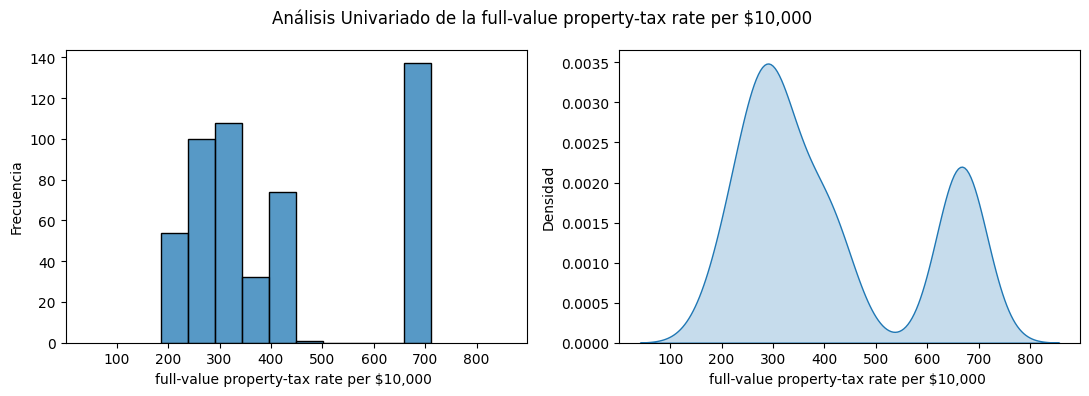

In [82]:
var = 'TAX'
var_title = 'full-value property-tax rate per $10,000 '

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# ratio alumnos-maestro por localidad

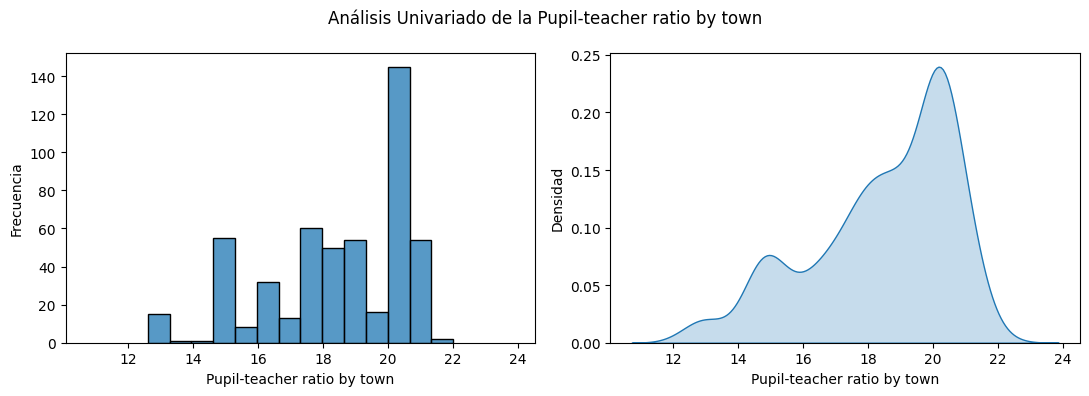

In [83]:
var = 'PTRATIO'
var_title = 'Pupil-teacher ratio by town'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# % estatus más bajo de la población

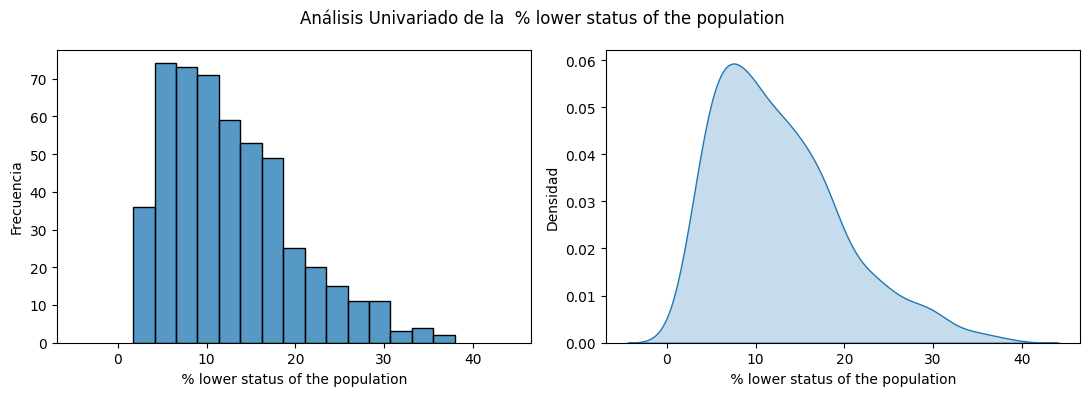

In [84]:
var = 'LSTAT'
var_title = ' % lower status of the population '

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Valor medio de viviendas ocupadas por sus propietarios en $1000

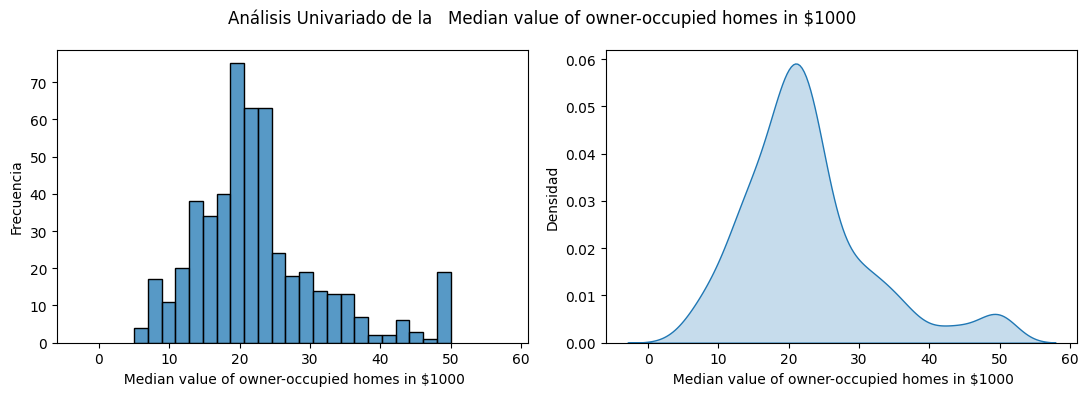

In [85]:
 
var = 'MEDV'
var_title = '  Median value of owner-occupied homes in $1000 '

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Dispersión de los datos (Valor medio de viviendas ocupadas vs % estatus más bajo de la población)

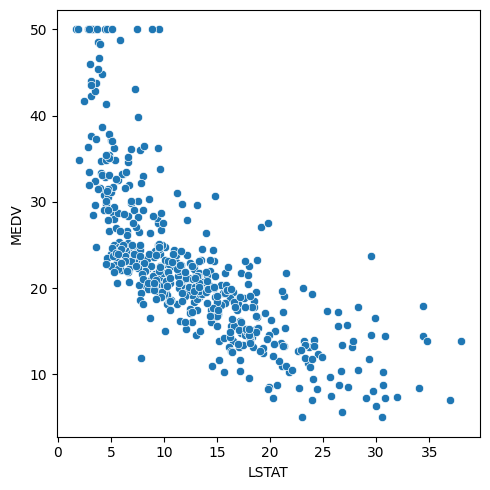

In [86]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", ax=ax)
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


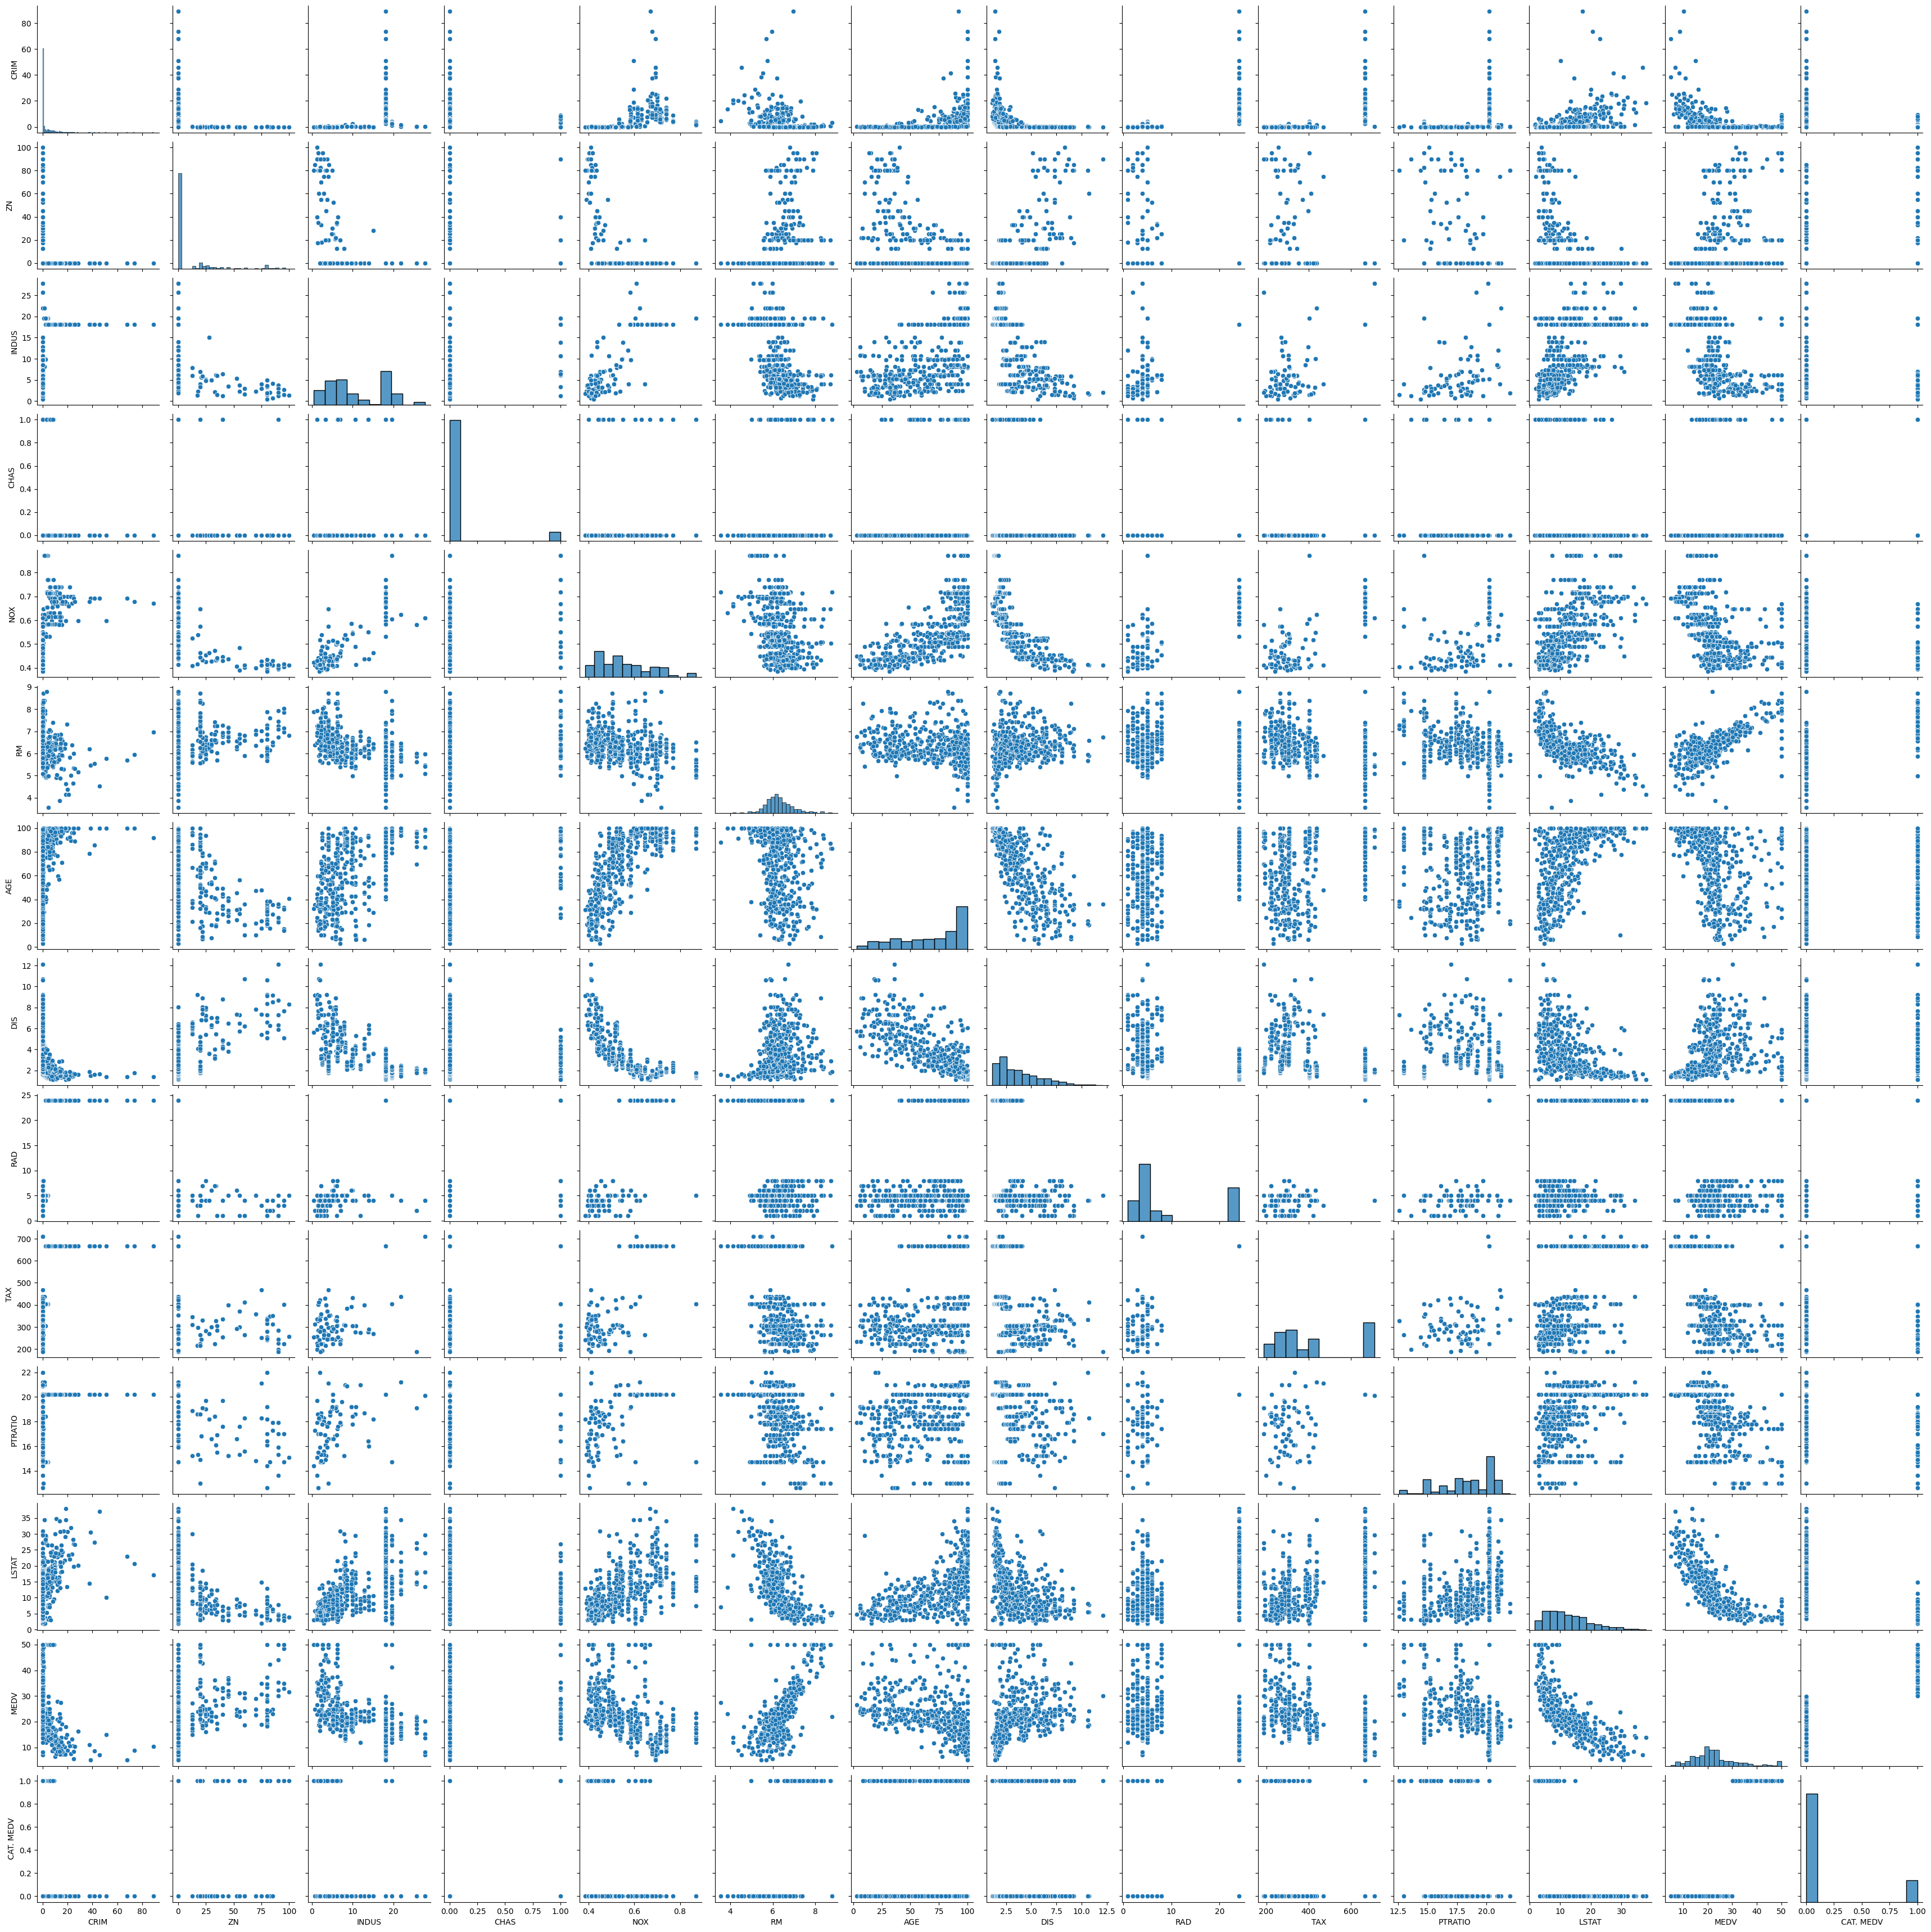

In [87]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[list_keys]
sns.pairplot(df_test, diag_kind="hist")

In [88]:
df_correlation = df[list_keys]
df_correlation.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


In [89]:
print(df_house.corr())

               CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
LSTAT      0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
MEDV      -0.388305  0.360445 -0.483725  0.175260 -

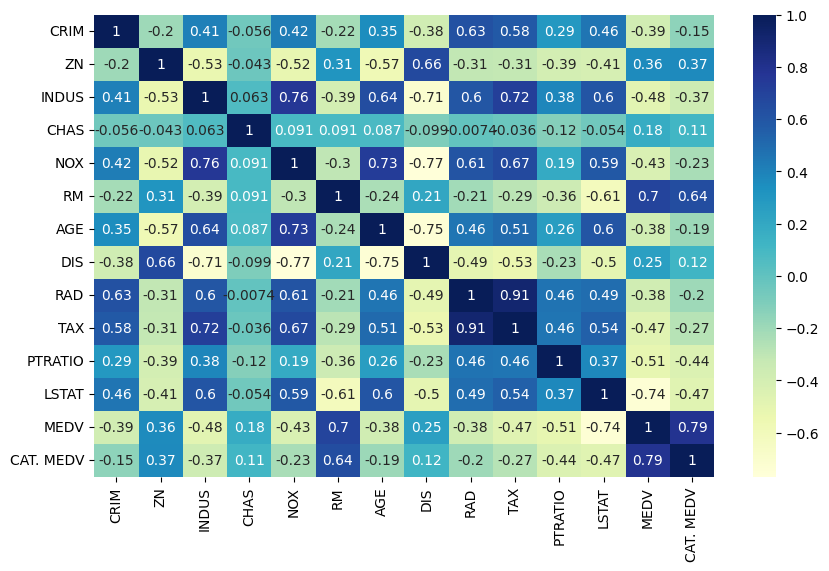

In [90]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);

+ En el caso de NOX obtuvo una correlación muy alta con INDUS y CHAS,
+ después TAX con INDUS, NOX y RAD y por último RM con MEDV y CAT.MEDV.
+ Una vez identificadas las dimensiones se removieron del conjunto de datos para mejorar el desempeño de nuestro algoritmo de reducción de dimensiones. Ahora el con- junto de datos cuenta con 10 dimensiones, después de remover NOX, TAX y RM.


In [106]:
df_house_v2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

# remover campos altamente corelacionados

In [304]:
#df.drop('a', inplace=True, axis=1)
df_house_v2 = df_house
#df_house_v2 = df_house_v2.drop('TAX',axis=1)
#df_house_v2 = df_house_v2.drop('RAD',axis=1)
#df_house_v2 = df_house_v2.drop('MEDV',axis=1)
df_house_v2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


# Set Train y testing

In [305]:
X,y = df_house_v2,df_house_v2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# PCA

In [306]:
#numero de componentes
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [307]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[9.58649561e-01 2.72424788e-02 8.56977926e-03 2.57855173e-03
 1.51165053e-03 5.98424281e-04 4.15304038e-04 3.01240925e-04
 8.99472413e-05]
suma 0.9999569378807942


# Graficar el acumulado de varianza explicada en las nuevas dimensiones

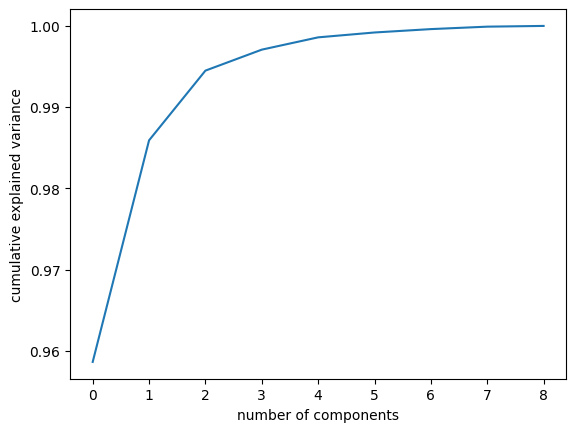

In [308]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [309]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
df_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2','PC3'])
df_pca

,PC1,PC2,PC3
0,38.883033,-31.079527,10.849049
1,-179.403009,-4.122226,2.710336
2,38.222860,-27.621374,9.123088
3,-51.068736,70.939599,12.963641
4,-209.491326,-48.949352,10.394227
...,...,...,...
349,-113.257772,-22.976351,-3.694592
350,-10.023659,55.541882,-1.928288
351,31.477777,-14.643218,-0.915184
352,-165.849687,-37.528161,4.837668


In [310]:
len(X_train_pca)

354

In [311]:
len(X_test_pca)

152

# Kmeans++ 

# Elbow method

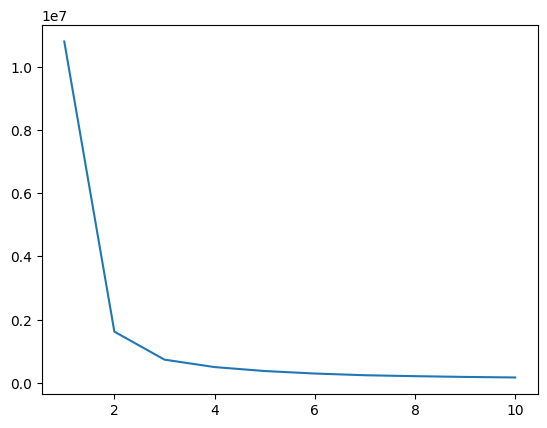

In [312]:
X_pca_plus = df_pca[['PC1', 'PC2','PC3']]
X_pca_ramdon = df_pca[['PC1', 'PC2','PC3']]
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show() 

# init='k-means++'

In [313]:
# Predicting the clusters
n_clusters_ = 3
kmeans_ = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=100, n_init=20, random_state=0)
labels = kmeans_.fit(X_train_pca)
y_kmeans = kmeans_.fit_predict(X_train_pca)
C = kmeans_.cluster_centers_
C

array([[ 267.91636534,    1.9729718 ,   -0.62546494],
       [-129.38533361,    2.22502949,   -0.66864813],
       [   7.00254375,  -10.09701918,    3.0836457 ]])

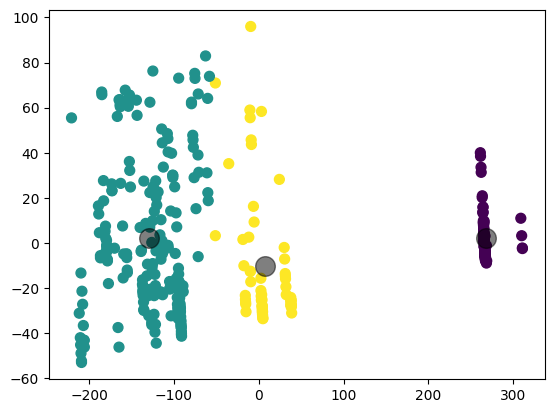

In [314]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [315]:
X_pca_plus['labels']= y_kmeans
X_pca_plus

,PC1,PC2,PC3,labels
0,38.883033,-31.079527,10.849049,2
1,-179.403009,-4.122226,2.710336,1
2,38.222860,-27.621374,9.123088,2
3,-51.068736,70.939599,12.963641,2
4,-209.491326,-48.949352,10.394227,1
...,...,...,...,...
349,-113.257772,-22.976351,-3.694592,1
350,-10.023659,55.541882,-1.928288,2
351,31.477777,-14.643218,-0.915184,2
352,-165.849687,-37.528161,4.837668,1


In [316]:
kmeans_random = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_random.fit(X_train_pca)
y_kmeans = kmeans_random.fit_predict(X_train_pca)
C = kmeans_random.cluster_centers_
C

array([[ 267.91636534,    1.9729718 ,   -0.62546494],
       [   7.00254375,  -10.09701918,    3.0836457 ],
       [-129.38533361,    2.22502949,   -0.66864813]])

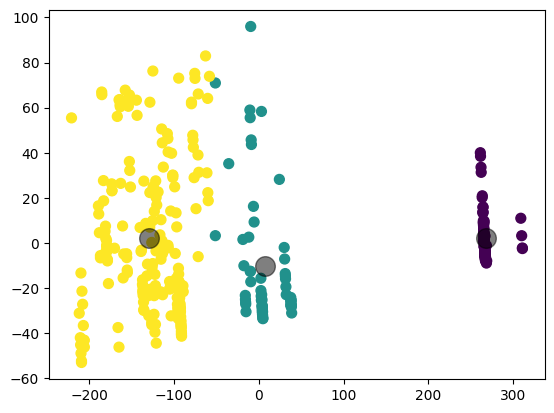

In [317]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [318]:
X_pca_ramdon['labels']= kmeans_random.labels_
X_pca_ramdon

,PC1,PC2,PC3,labels
0,38.883033,-31.079527,10.849049,1
1,-179.403009,-4.122226,2.710336,2
2,38.222860,-27.621374,9.123088,1
3,-51.068736,70.939599,12.963641,1
4,-209.491326,-48.949352,10.394227,2
...,...,...,...,...
349,-113.257772,-22.976351,-3.694592,2
350,-10.023659,55.541882,-1.928288,1
351,31.477777,-14.643218,-0.915184,1
352,-165.849687,-37.528161,4.837668,2


<Axes: xlabel='PC1', ylabel='PC2'>

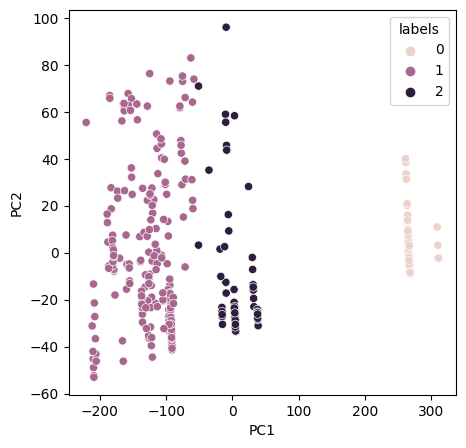

In [319]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=X_pca_plus, x="PC1", y="PC2", ax=ax, hue="labels")

# SVM

In [320]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [321]:
X = X_pca_plus[['PC1', 'PC2','PC3']].values
y = X_pca_plus.labels
y

0      2
1      1
2      2
3      2
4      1
      ..
349    1
350    2
351    2
352    1
353    1
Name: labels, Length: 354, dtype: int32

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [323]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [324]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Create dataframe with predict values

In [325]:
#y_pred
#X_test
df_predict = pd.DataFrame(X_test, columns = ['PC1','PC2','PC3'])
df_predict['labels'] = y_pred
df_predict

,PC1,PC2,PC3,labels
0,267.422883,-7.478406,7.026115,0
1,-93.804422,-17.500421,-7.230277,1
2,-101.296430,30.098069,-48.082117,1
3,265.734485,3.973491,-1.567724,0
4,-9.822631,-12.596445,-6.020642,2
...,...,...,...,...
102,-104.826965,-20.483883,-3.180578,1
103,267.037302,-4.915853,4.437979,0
104,-211.563759,-31.185011,-4.718857,1
105,-160.464065,7.514583,-5.300020,1


In [326]:
len(X)

354

In [391]:
#X_pca_ramdon.loc[X_pca_ramdon['labels' == 1]]

#X_pca_plus
df_plus = df_predict.loc[(df_predict['labels'] == 0) | (df_predict['labels'] == 2)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

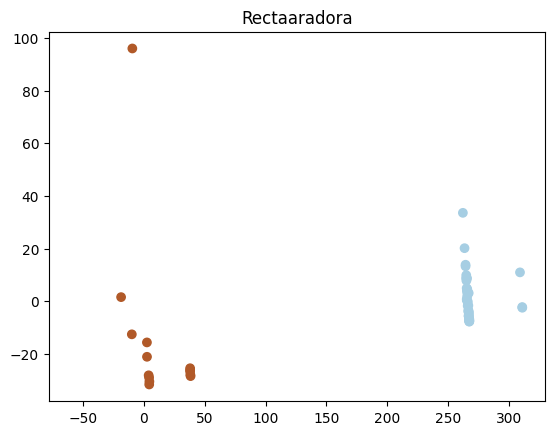

In [328]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Rectaaradora')

In [329]:
df_plus = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 2)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

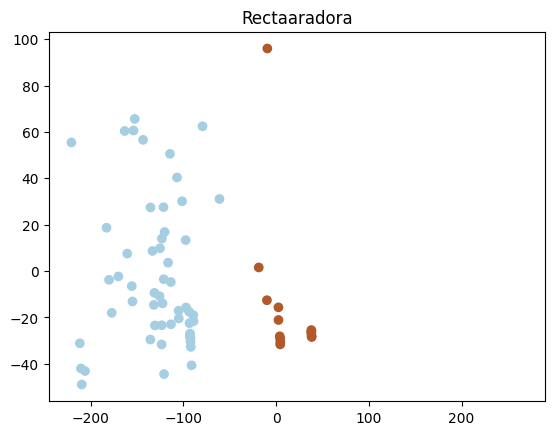

In [330]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

In [331]:
df_plus = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 0)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Rectaaradora')

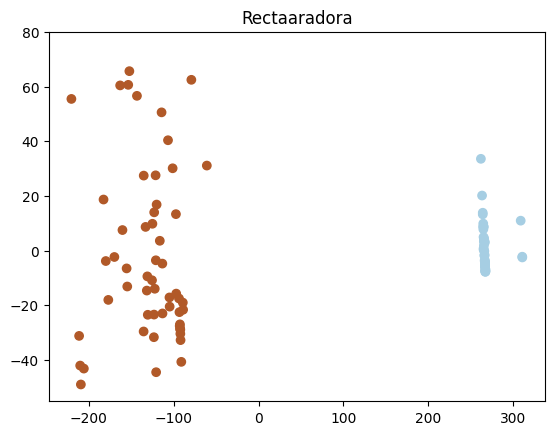

In [332]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

<Axes: xlabel='PC1', ylabel='PC3'>

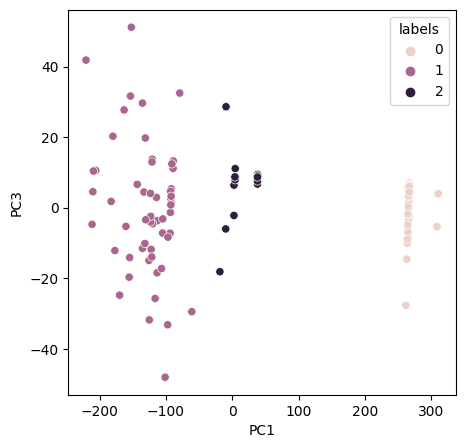

In [335]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_predict, x="PC1", y="PC3", ax=ax, hue="labels")

In [337]:
import pickle

In [345]:
pickle_file_pca = 'pca_model_integrador.plk'
with open(pickle_file_pca,'wb') as file:
    pickle.dump(pca,file)

pickle_file_kmeans = 'kmeans_model_integrador.plk'
with open(pickle_file_kmeans,'wb') as file:
    pickle.dump(kmeans_,file)

pickle_file_svm = 'svm_model_integrador.plk'
with open(pickle_file_svm,'wb') as file:
    pickle.dump(clf_svm,file)

In [349]:
#PCA
with open(pickle_file_pca,'rb') as file:
    pickle_pca = pickle.load(file)
X_PCA = pickle_pca.transform(df_house)
len(X_PCA)

506

In [351]:
#SVM 
with open(pickle_file_svm,'rb') as file:
    pickle_svm = pickle.load(file)
X_SVM = pickle_svm.predict(X_PCA)
X_SVM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,

In [352]:
df_house['labels'] = X_SVM

In [369]:
df_house.to_csv(os.environ['DATASETS_PATH'] + "/BostonGouse_classified" + ".csv")

In [353]:
df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,labels
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0,1


<Axes: xlabel='TAX', ylabel='NOX'>

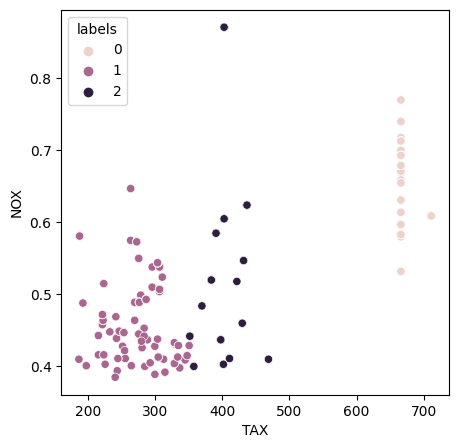

In [356]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_house, x="TAX", y="NOX", ax=ax, hue="labels")

# Analisis Multivariado

In [357]:
df_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV', 'labels'],
      dtype='object')

# tasa de criminalidad per cápita por ciudad

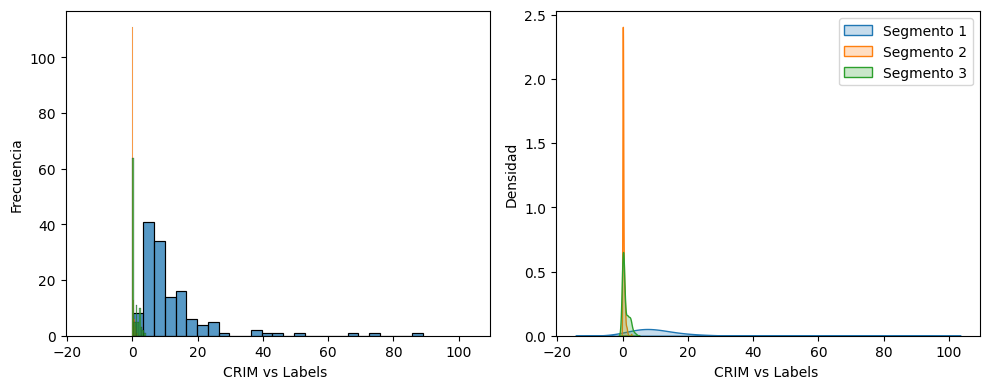

In [362]:
#Longitud del Sépalo vs Especies
var = 'CRIM'
var_title = 'CRIM vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

/var/folders/7s/1dmvm1gd3tn_rjywqwzf5mfw0000gn/T/ipykernel_55239/414675681.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])


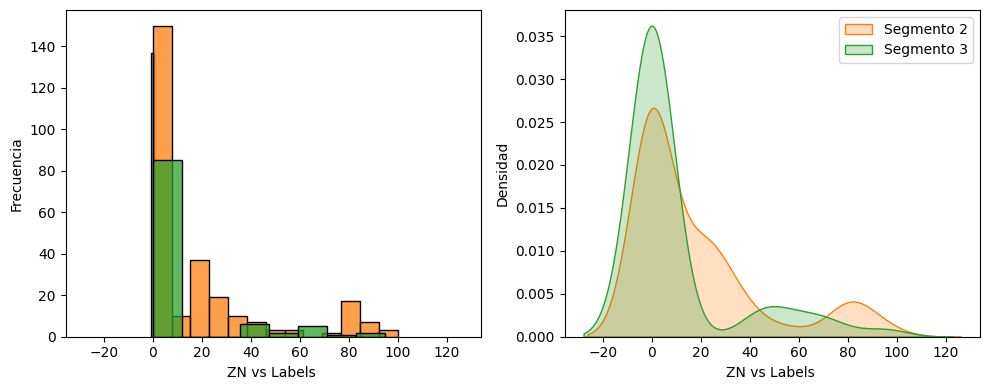

In [365]:
#Longitud del Sépalo vs Especies
var = 'ZN'
var_title = 'ZN vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Proporción de acres de negocios no minoristas por ciudad.

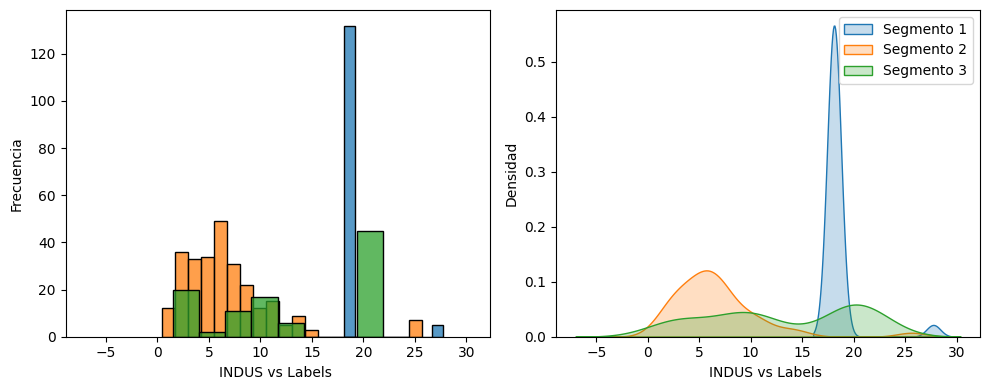

In [390]:
#Longitud del Sépalo vs Especies
var = 'INDUS'
var_title = 'INDUS vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)

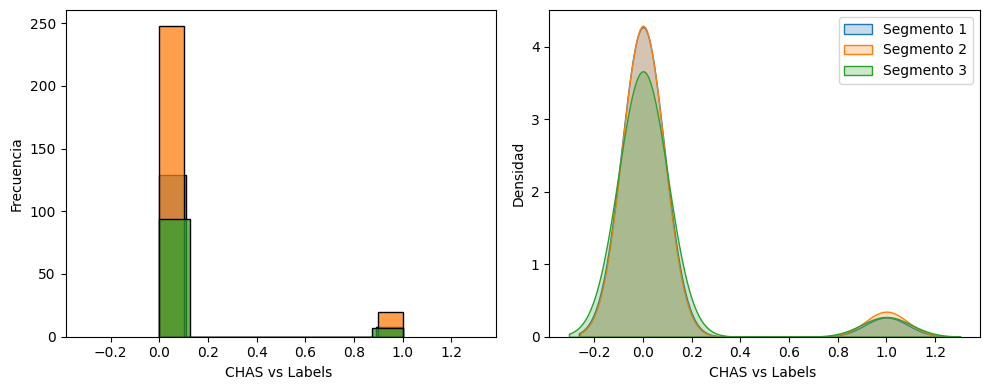

In [389]:
#Longitud del Sépalo vs Especies
var = 'CHAS'
var_title = 'CHAS vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Concentración de óxidos nítricos (partes por 10 millones)

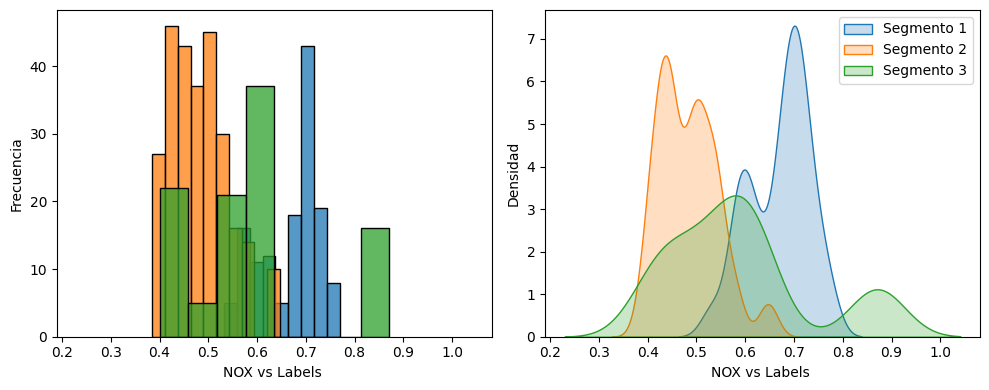

In [388]:
#Longitud del Sépalo vs Especies
var = 'NOX'
var_title = 'NOX vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

#  Número medio de habitaciones por vivienda

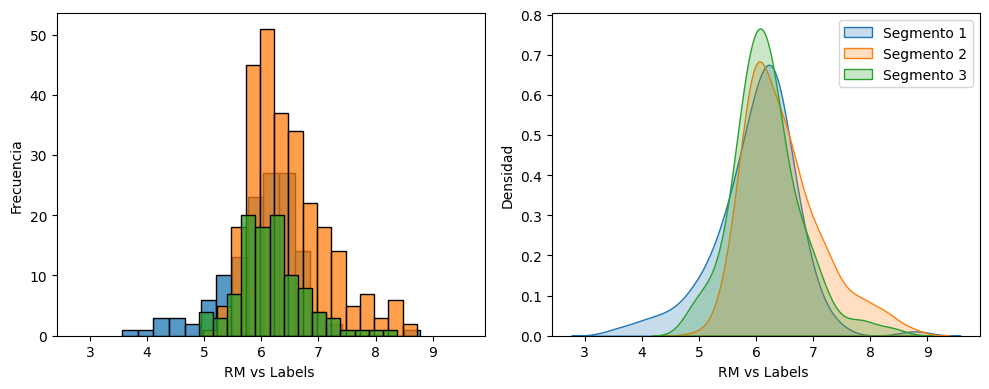

In [373]:
#Longitud del Sépalo vs Especies
var = 'RM'
var_title = 'RM vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Proporción de unidades ocupadas por sus propietarios construidas antes de 1940

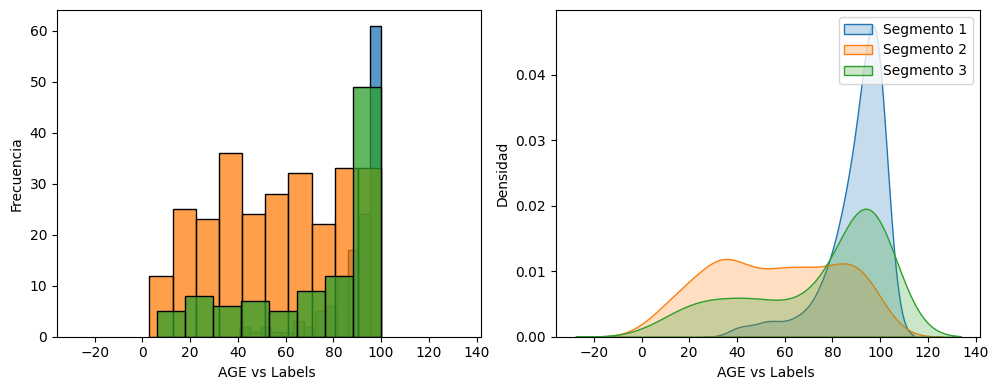

In [386]:
#Longitud del Sépalo vs Especies
var = 'AGE'
var_title = 'AGE vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Distancias ponderadas a cinco centros de empleo de Boston

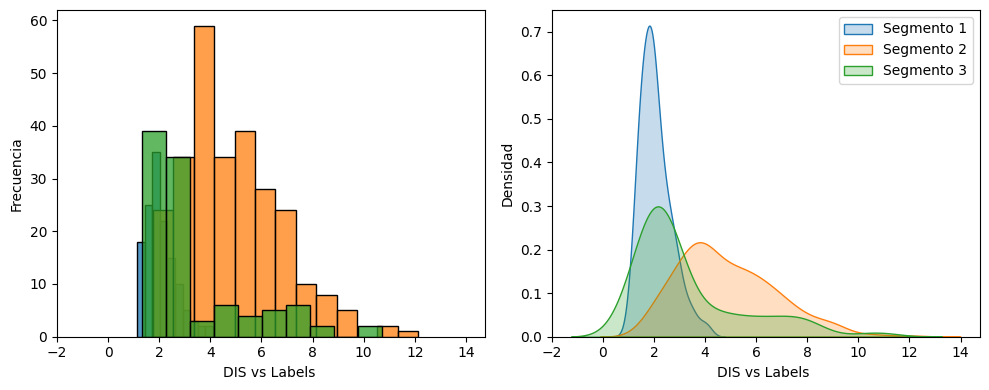

In [375]:
#Longitud del Sépalo vs Especies
var = 'DIS'
var_title = 'DIS vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# índice de accesibilidad a carreteras radiales

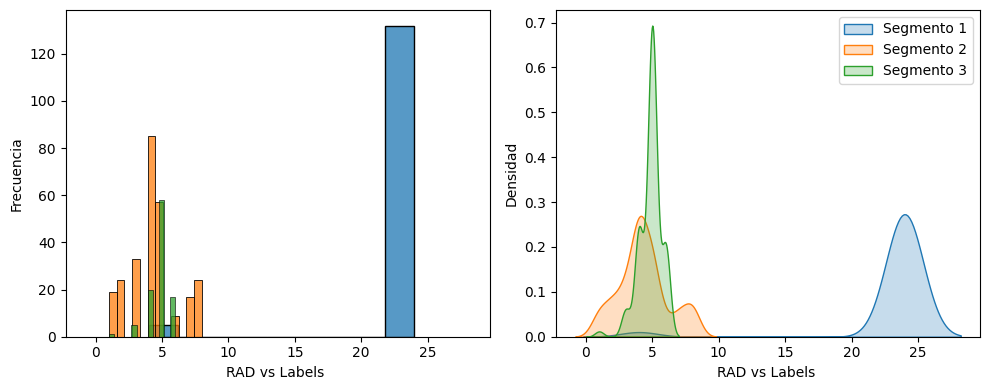

In [377]:
#Longitud del Sépalo vs Especies
var = 'RAD'
var_title = 'RAD vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Tasa de impuesto a la propiedad de valor total por $10,000

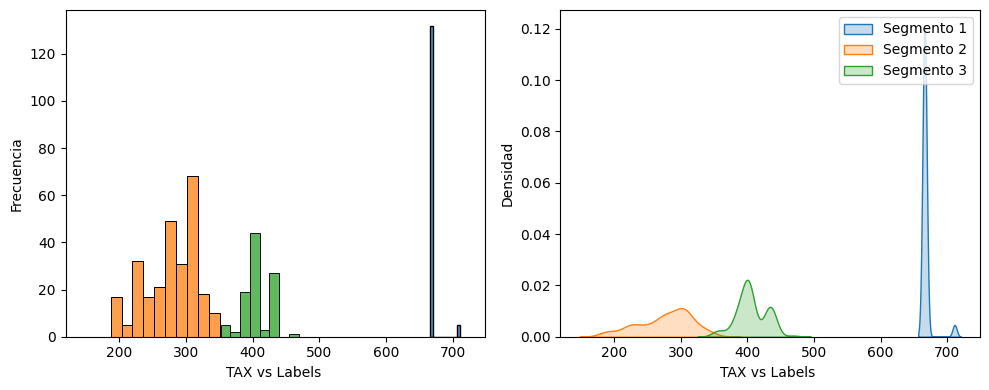

In [382]:
#Longitud del Sépalo vs Especies
var = 'TAX'
var_title = 'TAX vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# ratio alumnos-maestro por localidad

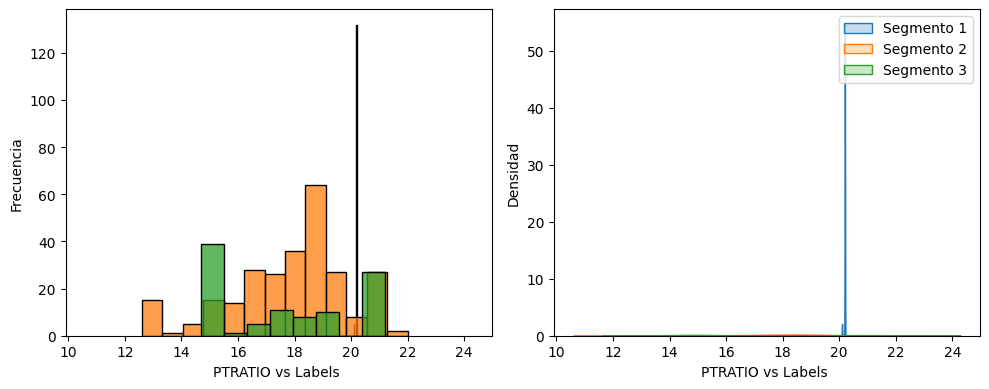

In [380]:
#Longitud del Sépalo vs Especies
var = 'PTRATIO'
var_title = 'PTRATIO vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# % estatus más bajo de la población

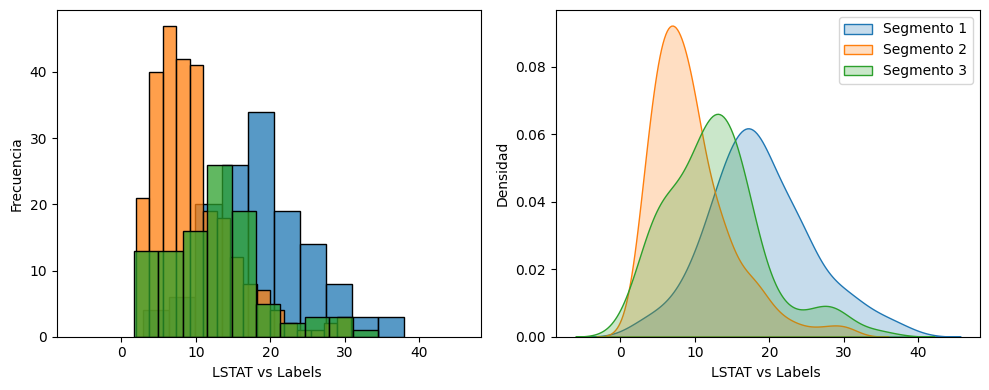

In [384]:
#Longitud del Sépalo vs Especies
var = 'LSTAT'
var_title = 'LSTAT vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()